In [5]:
# Mount google drive.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Imports.
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from datetime import timedelta, time, date, datetime
import os

Mounted at /content/drive


In [11]:
# Inputs.
initial_time  = time(8, 0, 35) # Time at which the recordings started.
n = 300
label = 'car'
directory = os.getcwd() + "/drive/My Drive/MA305_Project/transfer_video/traffic_data.npy"

In [18]:
directory

'/content/drive/My Drive/MA305_Project/transfer_video/traffic_data.npy'

In [12]:

# Import labels array.
full_array = np.load(directory, allow_pickle=True)
    
# Identify objects. 
times_array = []
obj_ct_array = np.zeros((full_array.shape[0], 60))
for i, element in enumerate(full_array):
    if len(element) > 0:
        cts = [element.count(i) for i in range(0, 60)]
        obj_ct_array[i] = cts
    times_array.append(i)

In [19]:
# Define labels.
with open("/content/drive/My Drive/MA305_Project/transfer_video/coco.csv", 'r') as lines:
  coco_labels = lines.readlines()[0].split(',')
    
# Moving average.
series = pd.Series(obj_ct_array[:, coco_labels.index(label)])
moving_average = series.rolling(n).mean()

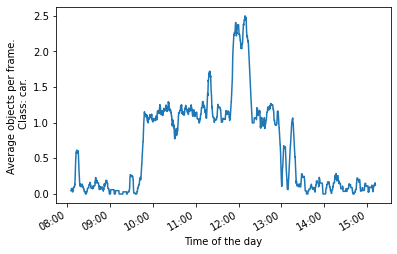

In [20]:
# Plot.
dt_initial = datetime.combine(date.today(), initial_time)
times = [dt_initial + timedelta(seconds=i) for i in times_array]
plt.plot(times, moving_average, '-')
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.ylabel('Average objects per frame. \n Class: {}.'.format(label))
plt.xlabel('Time of the day')
plt.show()